In [1]:
import sys
sys.path.append("../")
from triple_barrier.plots import PlotTripleBarrier
from triple_barrier.triple_barrier import TradeSide

import pandas as pd
import mplfinance as mpl

In [2]:
columns = ["date-time", "open", "high", "low", "close", "volume"]
df = pd.read_csv("../tests/data/EURUSD_5 Mins_Ask_2023.01.02_2024.02.02.csv", 
                 names=columns, parse_dates=True, 
                 index_col="date-time",
                 header=0)

In [3]:
FROM = 500
PERIODS = 100
TO = FROM + PERIODS

## Plot Data

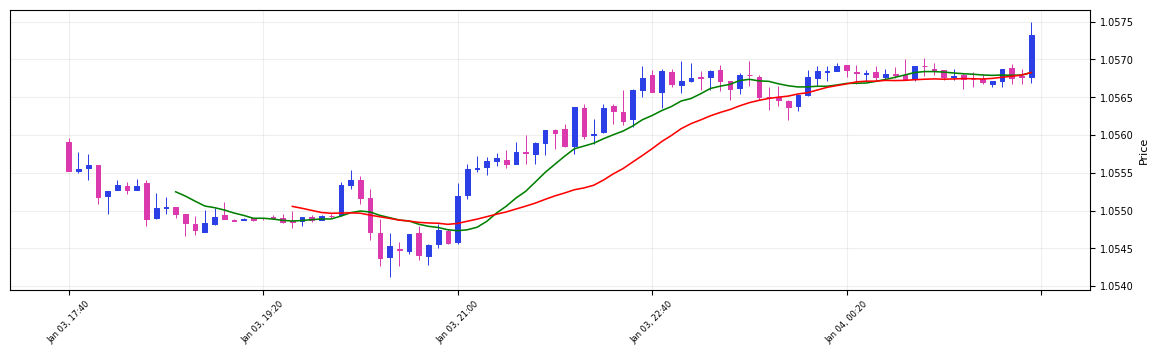

In [4]:
mpl.plot(df[FROM:TO], type="candle", figsize=(15,4), mav=(12,24), style="ibd")

In [5]:
plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           4)

### Short Cases

In [38]:
pip_position = 4
pip_factor = 10**-pip_position
open_period = "2023-01-03 20:30:00"
time_barrier = "2023-01-03 22:45:00"
open_price = df.open[open_period]
trade_side = TradeSide.SELL

stop_loss_width = 5
take_profit_width = 20

stop_loss = round(open_price - trade_side.value * stop_loss_width*pip_factor, pip_position + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*pip_factor, pip_position)

Plotting barrier for 51


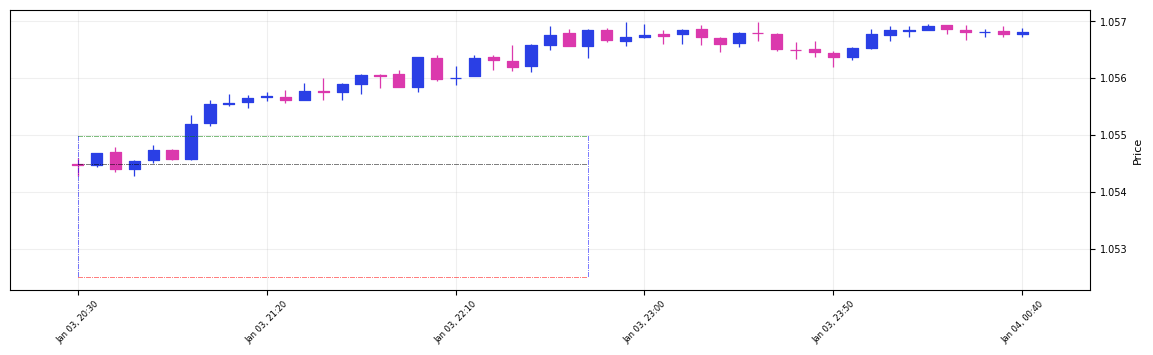

Open time  2023-01-03 20:30:00
Open price  1.05449
Stop loss 1.05499 (5) pips
Take profit 1.0525 (20) pips


In [39]:
plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Long Cases

In [32]:
pip_position = 4
pip_factor = 10**-pip_position
open_period = "2023-01-02 22:30:00"
time_barrier = "2023-01-03 01:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.BUY

stop_loss_width = 10
take_profit_width = 15

stop_loss = round(open_price - trade_side.value * stop_loss_width*pip_factor, pip_position + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*pip_factor, pip_position)

Plotting barrier for 51


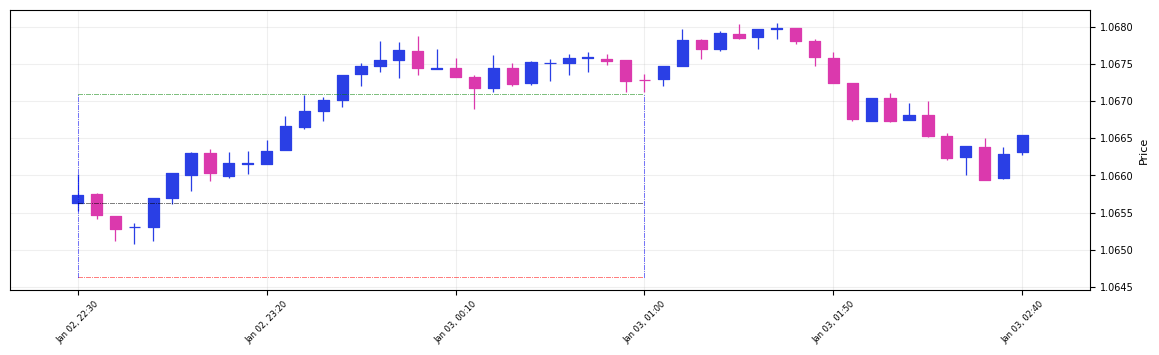

Open time  2023-01-02 22:30:00
Open price  1.06563
Stop loss 1.06463 (10) pips
Take profit 1.0671 (15) pips


In [33]:
plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             periods_to_plot=50
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

In [10]:
df[FROM: TO].head(10)

,open,high,low,close,volume
date-time,,,,,
2023-01-03 17:40:00,1.05591,1.05596,1.05552,1.05552,649.39
2023-01-03 17:45:00,1.05552,1.05578,1.05550,1.05555,554.25
2023-01-03 17:50:00,1.05556,1.05575,1.05541,1.05560,858.01
2023-01-03 17:55:00,1.05560,1.05560,1.05509,1.05518,1132.50
2023-01-03 18:00:00,1.05519,1.05526,1.05496,1.05526,501.51
2023-01-03 18:05:00,1.05527,1.05540,1.05527,1.05534,254.27
2023-01-03 18:10:00,1.05533,1.05538,1.05522,1.05527,64.95
2023-01-03 18:15:00,1.05527,1.05542,1.05527,1.05533,72.24
2023-01-03 18:20:00,1.05536,1.05541,1.05479,1.05489,442.60
